In [1]:
import os
os.chdir("/Users/michael/work/consulting/CORE-Skills2020/content2020")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/michael/work/consulting/CORE-Skills2020/content2020'

In [2]:
#credit for what follows: https://towardsdatascience.com/visualizing-my-linkedin-network-c4b232ab2ad0
import pandas as pd
df = pd.read_csv('Connections.csv')
df.head()

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Rasit,Abay,NaN,UNSW Canberra,PhD Candidate (Astrodynamics & Machine Learning),07 Mar 2020
1,Ximena,Aguirre,NaN,Milenio Diario,Gerente Corporativo Sr Sustentabilidad,28 Feb 2020
2,Tyler,Bikaun,NaN,Wood,Graduate Mechanical Engineer,28 Feb 2020
3,Malka N.,Halgamuge,malka.nisha@unimelb.edu.au,Department of Electrical and Electronic Engine...,Research Scientist,24 Feb 2020
4,Sanal,Panicker,NaN,Community News,Database Manager,23 Feb 2020


In [8]:
#need plotly: conda install -c plotly plotly
import plotly.express as px
px.treemap(df, path=['My Network', 'Company', 'Postion'], width=1200, height=1200)
#according to the aforementioned blogpost, this call to plotly.tree

ValueError: Value of 'path_0' is not the name of a column in 'data_frame'. Expected one of ['First Name', 'Last Name', 'Email Address', 'Company', 'Position', 'Connected On'] but received: My Network

In [4]:
#replace the NaNs with strings
i=1
for ind in df.index:
    if isinstance(df['First Name'][ind] ,str) & isinstance(df['Last Name'][ind] ,str) :
        #do nothing
        pass #empty if statements confuse python
    else :
        df['First Name'][ind]='FirstName'+str(i)
        df['Last Name'][ind]='LastName'+str(i)
        i+=1

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime


G=nx.Graph()
for nodei in df.index:    
    nodeilabel= df['First Name'][nodei]+" "+df['Last Name'][nodei]
    nodeitime=df['Connected On'][nodei]
    nodeicomp=df['Company'][nodei]
    for nodej in df.index:
        if nodei!=nodej:
            if nodeicomp==df['Company'][nodej]: #are the nodes from the same company?
                G.add_edge(nodeilabel,df['First Name'][nodej]+" "+df['Last Name'][nodej])
            date1=datetime.strptime(nodeitime, '%d %b %Y').date()
            date2=datetime.strptime(df['Connected On'][nodej], '%d %b %Y').date()
            if (abs(date2-date1)<timedelta(days=1)): #are the nodes from the same time?
                G.add_edge(nodeilabel,df['First Name'][nodej]+" "+df['Last Name'][nodej])

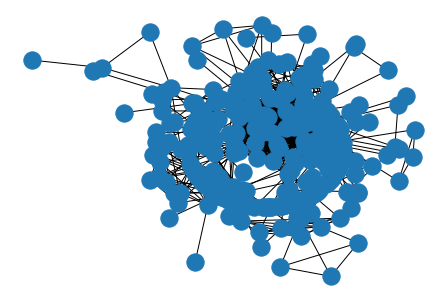

In [24]:
nx.draw_kamada_kawai(G,with_labels=False)

In [ ]:
df['Connected On'][nodei]

In [6]:
from datetime import datetime
datetime.strptime(df['Connected On'][nodei], '%d %b %Y')

datetime.datetime(2020, 3, 7, 0, 0)

In [ ]:
datetime.strptime(df['Connected On'][nodei], '%d %b %Y').date()-datetime.strptime(df['Connected On'][nodei-10], '%d %b %Y').date()

In [ ]:
Out[46].Ticks

In [ ]:

date1=datetime.strptime(df['Connected On'][nodei], '%d %b %Y').date()
date2=datetime.strptime(df['Connected On'][nodej], '%d %b %Y').date()
(date2-date1<timedelta(weeks=4))

In [22]:
abs(date1-date2)

datetime.timedelta(days=16)

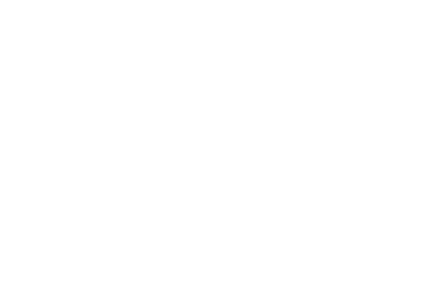

In [16]:
G=nx.Graph()
nx.draw(G)

In [30]:
#Credit: the following code is from https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#centrality
from operator import itemgetter

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('John Dell', 30)
('Dilusha Silva', 27)
('Sue Robson', 26)
('Simon Biggs', 26)
('Edgar Basto Piamonte', 26)
('Annabel Williamson GAICD', 25)
('Mark Reynolds', 25)
('Benjamin Stone', 25)
('Sean Hood', 25)
('David Walker', 25)
('Joanna Elfving-Hwang', 24)
('Kathrin Stroud', 24)
('Anas Ghadouani', 24)
('Eun-Jung Holden', 24)
('Michael Bertolacci', 24)
('Peter Dean', 24)
('Rob Shannon', 24)
('Claire Walker', 24)
('Cristina Vulpe', 24)
('Mitchell Chiew', 24)


In [31]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [32]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('John Dell', 0.0059481443823080835)
('Grant Douglas', 0.0038637519064565326)
('Dilusha Silva', 0.003202846975088968)
('Sue Robson', 0.0021860701576004067)
('Simon Biggs', 0.0021860701576004067)
('Benjamin Stone', 0.0021860701576004067)
('Edgar Basto Piamonte', 0.0021860701576004067)
('nariman mahdavi', 0.0012709710218607015)
('Annabel Williamson GAICD', 0.0011184544992374173)
('Mark Reynolds', 0.0011184544992374173)
('Sean Hood', 0.0011184544992374173)
('David Walker', 0.0011184544992374173)
('Zhang Xin', 0.0011184544992374173)
('Gaurav Singh', 0.0010167768174885613)
('Hayley Mcgillivray', 0.0008769700050838841)
('Jelena Markov', 0.0008769700050838841)
('Phil Newman', 0.000762582613116421)
('Brendan Florio', 0.0006609049313675648)
('Jens Klump', 0.0006609049313675648)
('Michael McWilliams', 0.0006609049313675648)


In [33]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: John Dell | Betweenness Centrality: 0.0059481443823080835 | Degree: 30
Name: Grant Douglas | Betweenness Centrality: 0.0038637519064565326 | Degree: 19
Name: Dilusha Silva | Betweenness Centrality: 0.003202846975088968 | Degree: 27
Name: Sue Robson | Betweenness Centrality: 0.0021860701576004067 | Degree: 26
Name: Simon Biggs | Betweenness Centrality: 0.0021860701576004067 | Degree: 26
Name: Benjamin Stone | Betweenness Centrality: 0.0021860701576004067 | Degree: 25
Name: Edgar Basto Piamonte | Betweenness Centrality: 0.0021860701576004067 | Degree: 26
Name: nariman mahdavi | Betweenness Centrality: 0.0012709710218607015 | Degree: 14
Name: Annabel Williamson GAICD | Betweenness Centrality: 0.0011184544992374173 | Degree: 25
Name: Mark Reynolds | Betweenness Centrality: 0.0011184544992374173 | Degree: 25
Name: Sean Hood | Betweenness Centrality: 0.0011184544992374173 | Degree: 25
Name: David Walker | Betweenness Centrality: 0.0011184544992374173 | Degree: 25
Name: Zhang Xin | Betw

In [35]:
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
communities = community.greedy_modularity_communities(G)

In [36]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [37]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: Dilusha Silva | Eigenvector Centrality: 0.2006224862442516
Name: Sue Robson | Eigenvector Centrality: 0.200225924746069
Name: Simon Biggs | Eigenvector Centrality: 0.200225924746069
Name: Edgar Basto Piamonte | Eigenvector Centrality: 0.200225924746069
Name: Benjamin Stone | Eigenvector Centrality: 0.19986431094964086


In [38]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['Lucas Lacasa', 'Sivarit Sultornsanee, Ph.D.', '炎 Tomas 黃', 'Zhang Xin', 'Simon Biggs', '思源 吉', 'Joanna Elfving-Hwang', 'Dilusha Silva', 'Claire Walker', 'Kathrin Stroud', 'David Walker', 'Kevin Xiao', 'Anas Ghadouani', 'YANG BAI', 'Mark Reynolds', 'Cristina Vulpe', 'Melinda Hodkiewicz', 'Mitchell Chiew', 'Sue Robson', 'Edgar Basto Piamonte', 'Jill Stajduhar GAICD', 'Joshua B. van Kampen MBA', 'Benjamin Stone', 'Xi Shen', 'Annabel Williamson GAICD', 'JP Barnard', 'Eun-Jung Holden', 'Mythreye Krishnan', 'Muhammad Hamza', '静 石', 'Sean Hood', 'Mark Holton', 'Michael Bertolacci', 'Anne Geiger De Feo', 'Tim Craske', 'Cheryl Praeger', 'Xiumin Li', 'Peter Dean', 'Rob Shannon']
Class 1: ['Hayley Mcgillivray', 'nariman mahdavi', 'Nick Saunders', 'Brendan Florio', 'Jens Klump', 'Angus McFarlane', 'Ulrich Engelke', 'Margaux Le Vaillant', 'Jelena Markov', 'Grant Kopec', 'Mukhdeep Singh Manshahia (Dr.)', 'Hugo Le Breton', 'Ingo Fischer', 'Xinghuo Yu', 'Grant Douglas', 'Neil Francis', 'Alf